# Chapter 8: Machine Learning with scikit-learn

<div id="toc"></div>

## 8.1 The scikit-learn Library

## 8.2 Machine Learning

### Supervised and Unsupervised Learning

### Training Set and Testing Set

## 8.3 Supervised Learning with scikit-learn

## 8.4 The Iris Flower Dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

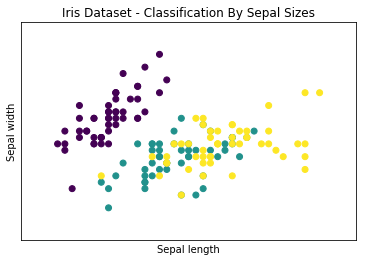

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,0] #X-Axis - sepal length
y = iris.data[:,1] #Y-Axis - sepal length
species = iris.target #Species
x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Sepal Sizes')
plt.scatter(x,y, c=species)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

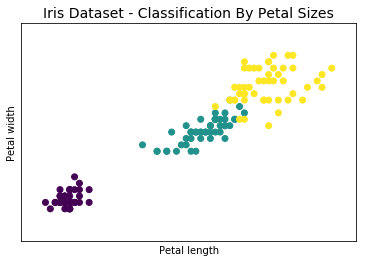

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,2] #X-Axis - petal length
y = iris.data[:,3] #Y-Axis - petal length
species = iris.target #Species
x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5
#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Petal Sizes', size=14)
plt.scatter(x,y, c=species)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### The PCA Decomposition

In [7]:
from sklearn.decomposition import PCA
x_reduced = PCA(n_components=3).fit_transform(iris.data)

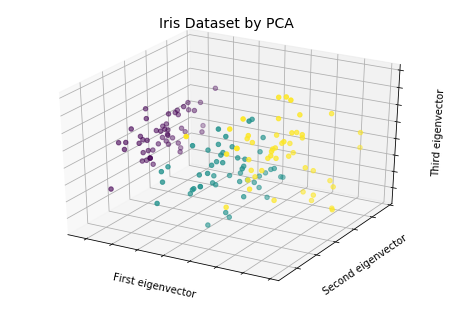

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
x = iris.data[:,1] #X-Axis - petal length
y = iris.data[:,2] #Y-Axis - petal length
species = iris.target #Species
x_reduced = PCA(n_components=3).fit_transform(iris.data)
#SCATTERPLOT 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

## 8.5 K-Nearest Neighbors Classifier

In [9]:
import numpy as np
from sklearn import datasets
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [12]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data[:,:2] #X-Axis - sepal length-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(1.5, 4.900000000000003)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data[:,2:4] #X-Axis - petals length-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(-0.40000000000000002, 2.9800000000000031)

## 8.6 Diabetes Dataset

In [15]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [16]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [17]:
np.sum(diabetes.data[:,0]**2)

1.0000000000000746

In [18]:
diabetes.target

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

## 8.7 Linear Regression: The Least Square Regression

In [19]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [20]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

In [21]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
linreg.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [23]:
linreg.predict(x_test)

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

In [24]:
y_test

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,
         66.,  173.,   72.,   49.,   64.,   48.,  178.,  104.,  132.,
        220.,   57.])

In [25]:
linreg.score(x_test, y_test) 

0.58507530226905713

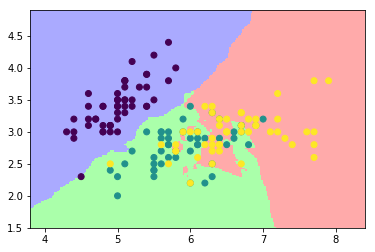

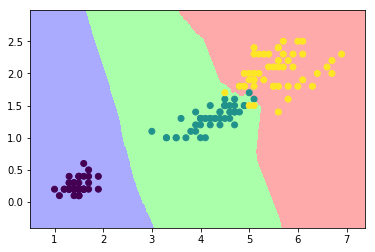

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
x0_test = x_test[:,0]
x0_train = x_train[:,0]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]
linreg = linear_model.LinearRegression()
linreg.fit(x0_train,y_train)
y = linreg.predict(x0_test)
plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y,color='b',linewidth=3)
plt.show()

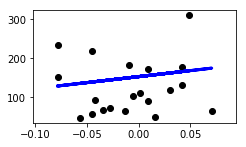

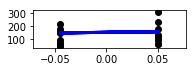

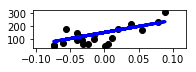

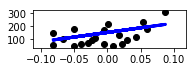

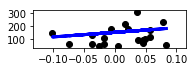

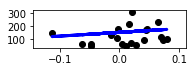

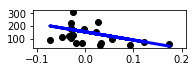

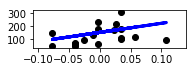

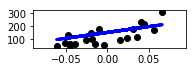

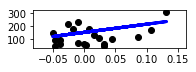

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
plt.figure(figsize=(8,12))
for f in range(0,10):
    xi_test = x_test[:,f]
    xi_train = x_train[:,f]
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]
    linreg.fit(xi_train,y_train)
    y = linreg.predict(xi_test)
    plt.subplot(5,2,f+1)
    plt.scatter(xi_test,y_test,color='k')
    plt.plot(xi_test,y,color='b',linewidth=3)
    plt.show()

## 8.8 Support Vector Machines (SVMs

### Support Vector Classification ( SVC

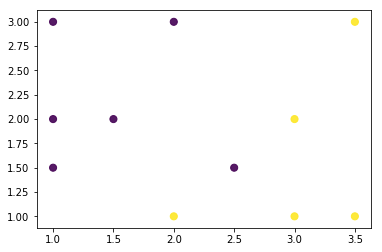

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

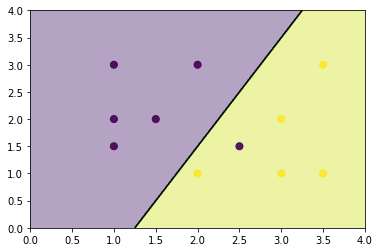

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

In [32]:
svc.predict([1.5,2.5])

C:\Anaconda36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [33]:
svc.predict([2.5,1])

C:\Anaconda36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

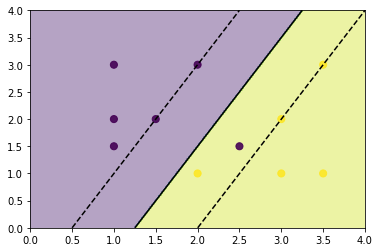

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear',C=1).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

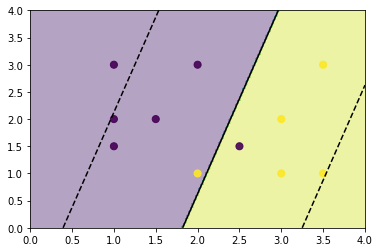

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear', C=0.1).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

### Nonlinear SVC

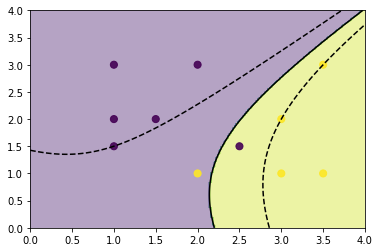

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='poly',C=1, degree=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

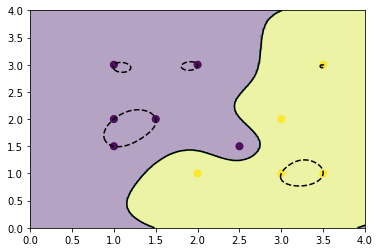

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
              [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='rbf', C=1, gamma=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)
plt.show()

### Plotting Different SVM Classifiers Using the Iris Dataset

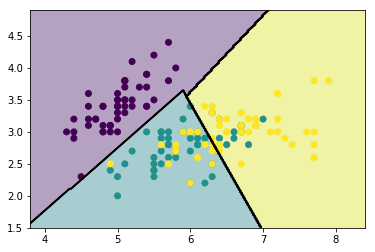

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='linear',C=1.0).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

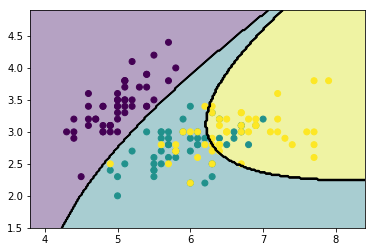

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='poly',C=1.0,degree=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### Support Vector Regression (SVR

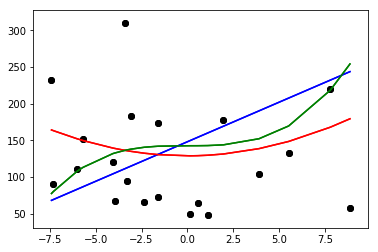

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
x0_test = x_test[:,2]
x0_train = x_train[:,2]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]
x0_test.sort(axis=0)
x0_test = x0_test*100
x0_train = x0_train*100
svr = svm.SVR(kernel='linear',C=1000)
svr2 = svm.SVR(kernel='poly',C=1000,degree=2)
svr3 = svm.SVR(kernel='poly',C=1000,degree=3)
svr.fit(x0_train,y_train)
svr2.fit(x0_train,y_train)
svr3.fit(x0_train,y_train)
y = svr.predict(x0_test)
y2 = svr2.predict(x0_test)
y3 = svr3.predict(x0_test)
plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y,color='b')
plt.plot(x0_test,y2,c='r')
plt.plot(x0_test,y3,c='g')
plt.show()

## 8.9 Conclusions